In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [91]:
df = pd.read_csv("/Users/niklashjort/Desktop/Projects/DeepLearnApi/DeepLearnApi/training/data/apple_data.csv")
df = df.sort_values('datetime')


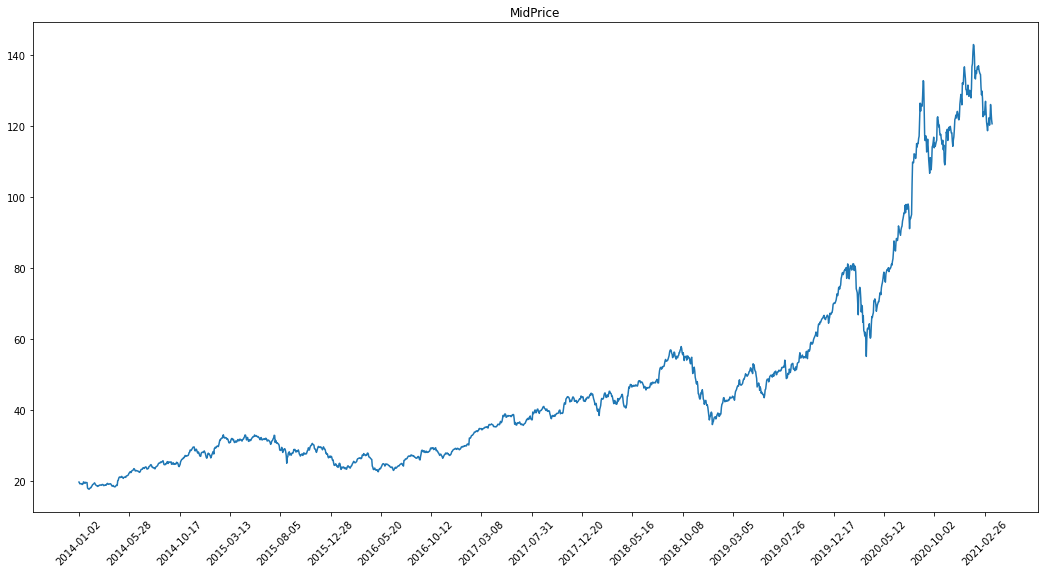

In [46]:
plt.figure(figsize = (18,9))
plt.plot((df['low']+df['high'])/2.0)
plt.xticks(range(0,df.index.shape[0], 100), rotation=45)
plt.title("MidPrice")
plt.show()


In [95]:
high_prices = df['high'].to_numpy()
low_prices = df['low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0
print(len(mid_prices))

1816


In [96]:
train_data = mid_prices[:1600]
test_data = mid_prices[1600:]
print(len(train_data))
print(len(test_data))

1600
216


In [97]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [98]:
window_size = 400
for di in range(0, 1600, window_size):
    scaler.fit(train_data[di:di+window_size,:])
    train_data[di:di+window_size,:] = scaler.transform(train_data[di:di+window_size,:])

train_data


array([[0.132784  ],
       [0.1154009 ],
       [0.09940425],
       ...,
       [0.88274147],
       [0.90346829],
       [0.9301368 ]])

In [99]:
train_data = train_data.reshape(-1)
test_data = scaler.transform(test_data).reshape(-1)

In [100]:
EMA = 0.0
gamma = 0.1
for ti in range(1600):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA
    
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [101]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx, 'datetime']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.01749


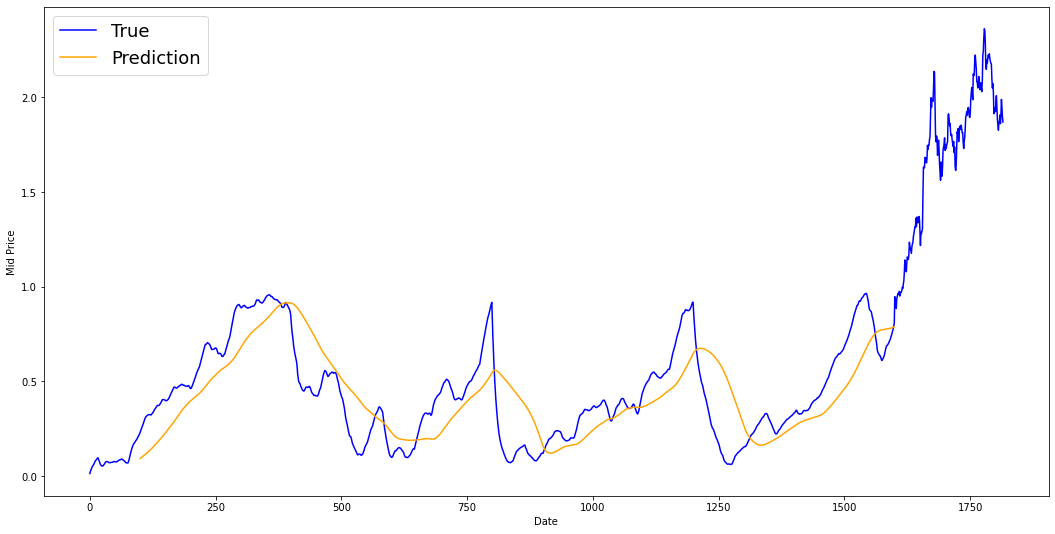

In [102]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [103]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00014


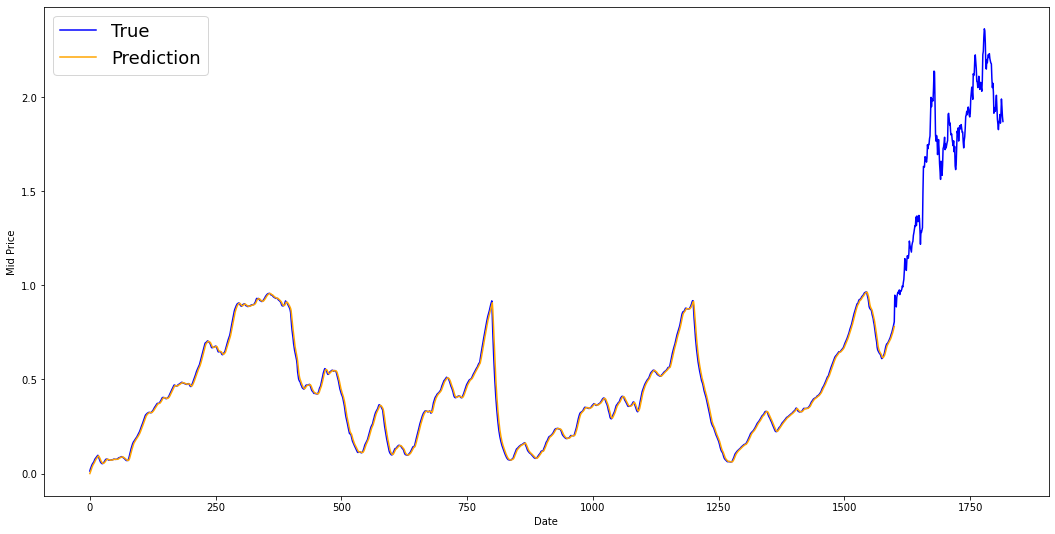

In [104]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()